**INFORMATION**

```
Panther's ID:       6314061
Student's Name:     Quang Tuan Le
Professor's Name:   Prof. Ron Zacharski
Semester:           Spring 2023 - CAP4770 
```

**Intro to Data Mining**

**Project #2 - CRATE AND BARREL**

Description:

The Otto Group is one of the world's biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). We are selling millions of products worldwide every day, with several thousand products being added to our product line. 

A consistent analysis of the performance of our product is crucial. However, due to our diverse global infrastructure, many identical products get classified differently. Therefore, the quality of our product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insight we can generate about our product range.

#### **1) Prepare Dataset to Process**

This is the link of resources:

https://github.com/quangle2706/ml-class-quangle/blob/main/resources/otto-group-product-classification-challenge.zip 

Because my project is currently private, I could not use !wget to download it to colab. So, I usually have my file and upload it to Colab.

In [ ]:
!unzip otto-group-product-classification-challenge.zip

Archive:  otto-group-product-classification-challenge.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls

otto-group-product-classification-challenge.zip  test.csv
sample_data					 train.csv
sampleSubmission.csv


#### **2) Import Necessary Libraries**

In [ ]:
# import the pandas library
import pandas as pd

# import the numpy library
import numpy as np 

# import the OneHotEncoder & LabelEncoder for pre-processing data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# import the model selection libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# import xgboost classifier
from xgboost import XGBClassifier

# import the Bagging & Pasting classifier
from sklearn.ensemble import BaggingClassifier

# import the decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# import the metrics/accuracy classifier
from sklearn.metrics import accuracy_score

#### **3) Read in and Explore the Data**

In [ ]:
import pandas as pd

# read in the data file 
train = pd.read_csv('train.csv', index_col='id')
test_features = pd.read_csv('test.csv', index_col='id')
train

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61874,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61875,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,Class_9


#### **4) Data Analysis**

Analyze the dataset / The dataset is already numerical data

##### Divide the dataset

Divide the dataset into 2 parts including Features and Labels

In [ ]:
# features contain all columns except the target
train_features = train.drop('target', axis=1)

# labels will be a target column
train_labels = train['target']

train_labels

id
1        Class_1
2        Class_1
3        Class_1
4        Class_1
5        Class_1
          ...   
61874    Class_9
61875    Class_9
61876    Class_9
61877    Class_9
61878    Class_9
Name: target, Length: 61878, dtype: object

In [ ]:
# LabelEncoder for Otto Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)

#### **5) First try with XGBOOST Classifier**

##### **XGBOOST**

I will start with basic XGBoost Classifier with default hyperparameters.

In [ ]:
# Create parameters for initialize XGBoost Classifier
from xgboost import XGBClassifier
params = {"n_estimators": 400, 'tree_method':'gpu_hist', 'predictor':'gpu_predictor'}

model = XGBClassifier(**params)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor='gpu_predictor', random_state=None, ...)

In [ ]:
# XGBoost model fit the training set
model.fit(train_features, train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor='gpu_predictor', ...)

In [ ]:
# Get predictions and WILL test accuracy score on Kaggle
from sklearn.metrics import accuracy_score
model_predictions = model.predict(test_features)
model_predictions

array([3, 7, 5, ..., 1, 3, 1])

NOW I will transform the predictions into sampleSubmission form and upload to Kaggle.

In [ ]:
model_predictions_df =  pd.DataFrame(model_predictions, columns=['target'])
model_predictions_df

,target
0,3
1,7
2,5
3,1
4,8
...,...
144363,0
144364,2
144365,1
144366,3


In [ ]:
one_hot = pd.get_dummies(model_predictions_df['target'])

# Rename
one_hot = one_hot.rename(columns={0: 'Class_1'})
one_hot = one_hot.rename(columns={1: 'Class_2'})
one_hot = one_hot.rename(columns={2: 'Class_3'})
one_hot = one_hot.rename(columns={3: 'Class_4'})
one_hot = one_hot.rename(columns={4: 'Class_5'})
one_hot = one_hot.rename(columns={5: 'Class_6'})
one_hot = one_hot.rename(columns={6: 'Class_7'})
one_hot = one_hot.rename(columns={7: 'Class_8'})
one_hot = one_hot.rename(columns={8: 'Class_9'})

one_hot.index += 1

In [ ]:
# Export the dataframe to a CSV file
one_hot.to_csv('otto_xgboost_1.csv', index_label='id')

This is the result from KAGGLE

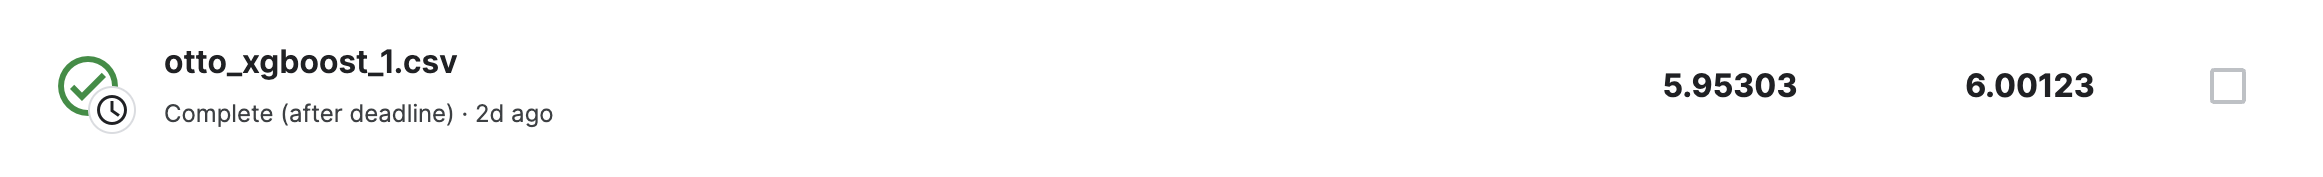

From that process, I will create a function to support export CSV file from numpy array.

#### **6) Exporting function**

To make them easier to export, I write a function that supports exporting CSV file in order to upload to KAGGLE

In [ ]:
import pandas as pd
import numpy as np

def export_csv_from_prediction_array(prediction_np, csv_filename):
  # Convert the numpy array to a Pandas dataframe
  df = pd.DataFrame(prediction_np, columns=['target'])

  one_hot = pd.get_dummies(df['target'])

  # Rename
  one_hot = one_hot.rename(columns={0: 'Class_1'})
  one_hot = one_hot.rename(columns={1: 'Class_2'})
  one_hot = one_hot.rename(columns={2: 'Class_3'})
  one_hot = one_hot.rename(columns={3: 'Class_4'})
  one_hot = one_hot.rename(columns={4: 'Class_5'})
  one_hot = one_hot.rename(columns={5: 'Class_6'})
  one_hot = one_hot.rename(columns={6: 'Class_7'})
  one_hot = one_hot.rename(columns={7: 'Class_8'})
  one_hot = one_hot.rename(columns={8: 'Class_9'})


  # In case that target does not have value for each class when using get_dummies
  if 'Class_1' not in one_hot.columns:
    one_hot = one_hot.assign(Class_1=0)

  if 'Class_2' not in one_hot.columns:
    one_hot = one_hot.assign(Class_2=0)

  if 'Class_3' not in one_hot.columns:
    one_hot = one_hot.assign(Class_3=0)

  if 'Class_4' not in one_hot.columns:
    one_hot = one_hot.assign(Class_4=0)

  if 'Class_5' not in one_hot.columns:
    one_hot = one_hot.assign(Class_5=0)

  if 'Class_6' not in one_hot.columns:
    one_hot = one_hot.assign(Class_6=0)

  if 'Class_7' not in one_hot.columns:
    one_hot = one_hot.assign(Class_7=0)

  if 'Class_8' not in one_hot.columns:
    one_hot = one_hot.assign(Class_8=0)

  if 'Class_9' not in one_hot.columns:
    one_hot = one_hot.assign(Class_9=0)

  one_hot.index += 1

  # Export the dataframe to a CSV file
  one_hot.to_csv(csv_filename, index_label='id')  

#### **7) Upgrade XGBoost method**

In [ ]:
# Set up param grid 
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [2, 4, 6, 8]
    }
]

In [ ]:
# Set up StratifiedKFold and apply RandomizedSearchCV to XGBoost model
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
param_comb = 5
folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=1001)
model_random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=param_comb, n_jobs=-1, 
                                         cv=skf.split(train_features, train_labels), verbose=3)

In [ ]:
%%time
model_grid_search = model_random_search.fit(train_features, train_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 9.79 s, sys: 428 ms, total: 10.2 s
Wall time: 2min 49s


In [ ]:
# get the best param among params
model_random_search.best_params_

{'n_estimators': 200, 'max_depth': 8}

In [ ]:
# make predictions
model_random_search_predictions = model_random_search.best_estimator_.predict(test_features)

In [ ]:
# export csv file to upload to Kaggle
export_csv_from_prediction_array(model_random_search_predictions, "xgboost_grid_search.csv")

This is the result from KAGGLE

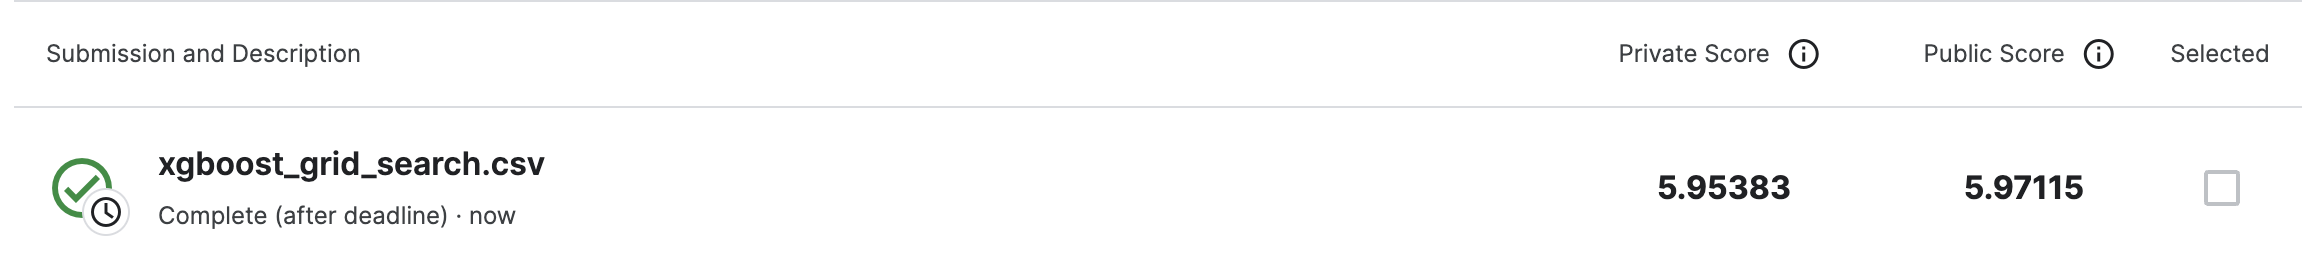

##### **This is my best score using XGBoost 5.95**

#### **8) Using Bagging & Pasting**

##### Basic Parameter for each types of Bagging Classifier

Initial Decision Tree Entropy

In [ ]:
# Initial decision tree to apply to Bagging Classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')

##### **Bagging Classifier**

In [ ]:
# Bagging Classifier with below parameters
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(clf, n_estimators=20, max_samples=100, bootstrap=True, n_jobs=-1)
bagging_clf.fit(train_features, train_labels)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_samples=100, n_estimators=20, n_jobs=-1)

In [ ]:
# make predictions
bagging_predictions = bagging_clf.predict(test_features)

In [ ]:
# export csv file to upload to Kaggle
export_csv_from_prediction_array(bagging_predictions, "bagging_clf.csv")

This is the result from KAGGLE

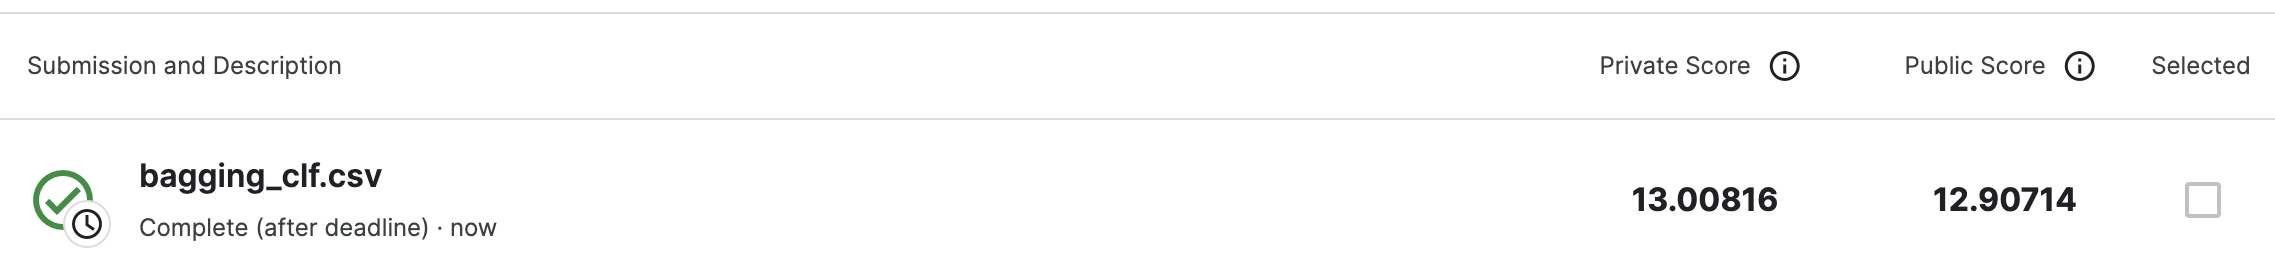

##### **Pasting Classifier**


In [ ]:
# Pasting Classifier with below parameters
pasting_clf = BaggingClassifier(clf, n_estimators=20, max_samples=100, 
                                bootstrap=False, n_jobs=-1)
pasting_clf.fit(train_features, train_labels)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_samples=100, n_estimators=20, n_jobs=-1)

In [ ]:
# Get predictions
pasting_predictions = pasting_clf.predict(test_features)

In [ ]:
# export csv file to upload to Kaggle
export_csv_from_prediction_array(pasting_predictions, "pasting_clf.csv")

The result from KAGGLE

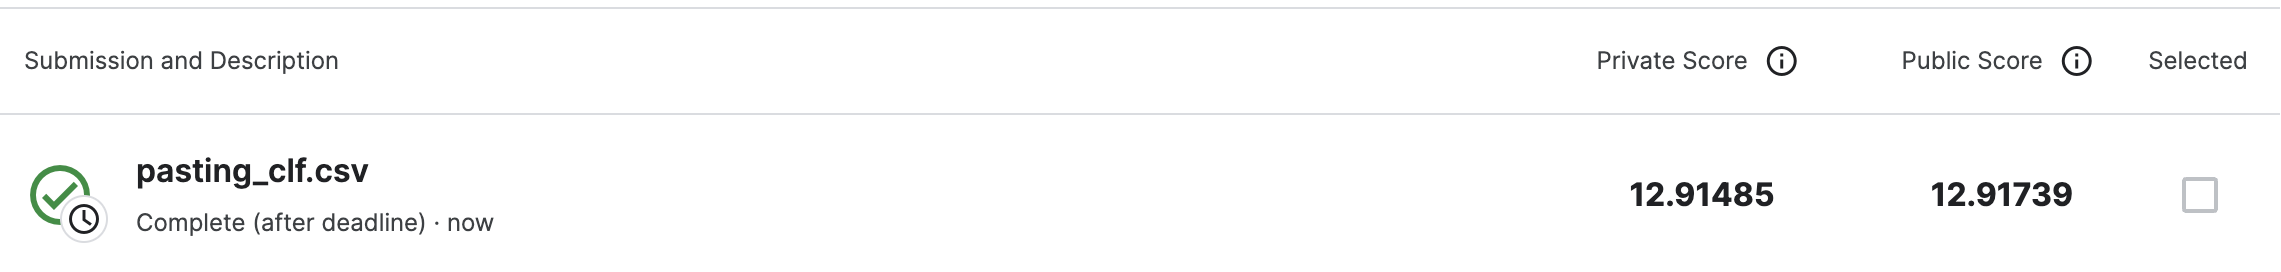

##### **Random Subspaces**

In [ ]:
# Random Subspaces Classifier with below parameters
subspace_clf = BaggingClassifier(clf, n_estimators=50, max_features=7, 
                                 bootstrap=True, n_jobs=-1)
subspace_clf.fit(train_features, train_labels)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_features=7, n_estimators=50, n_jobs=-1)

In [ ]:
# Get predictions 
subspace_predictions = subspace_clf.predict(test_features)

In [ ]:
# export csv file to upload to Kaggle
export_csv_from_prediction_array(subspace_predictions, "subspace_clf.csv")

Result from KAGGLE

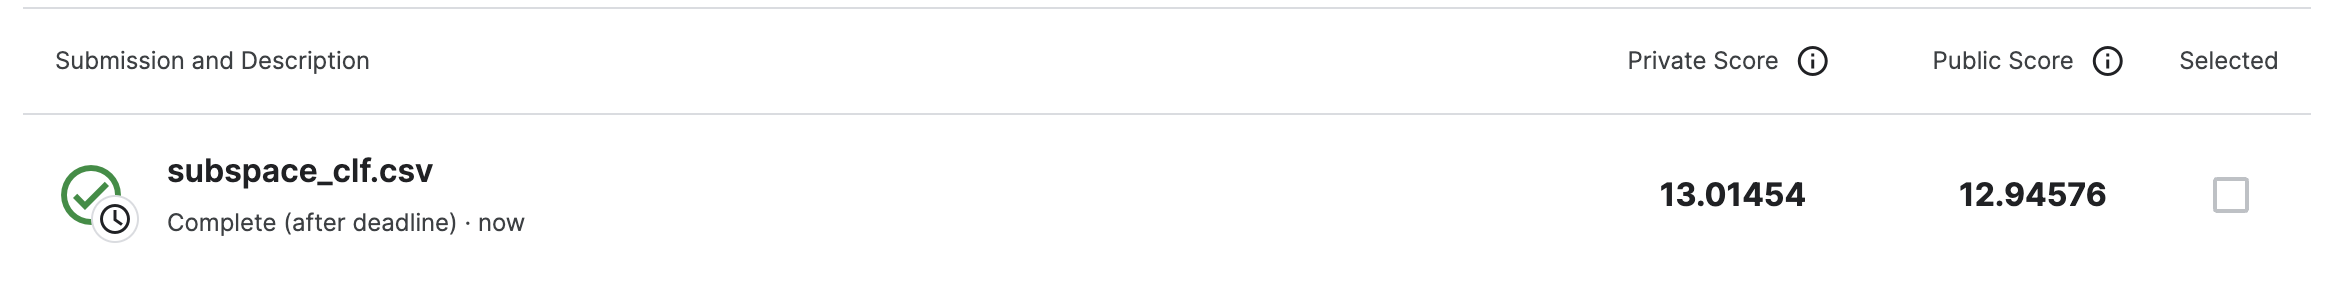

##### **Random Patches**

In [ ]:
# Random Patches with below parameters
patches_clf = BaggingClassifier(clf, n_estimators=100, max_features=7, 
                                max_samples=100, bootstrap=False, n_jobs=-1)
patches_clf.fit(train_features, train_labels)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_features=7, max_samples=100, n_estimators=100, n_jobs=-1)

In [ ]:
# Get predictions
patches_predictions = patches_clf.predict(test_features)

In [ ]:
patches_predictions

array([1, 5, 5, ..., 1, 1, 1])

In [ ]:
# export csv file to upload to Kaggle
export_csv_from_prediction_array(patches_predictions, "patches_clf.csv")

Result from KAGGLE 

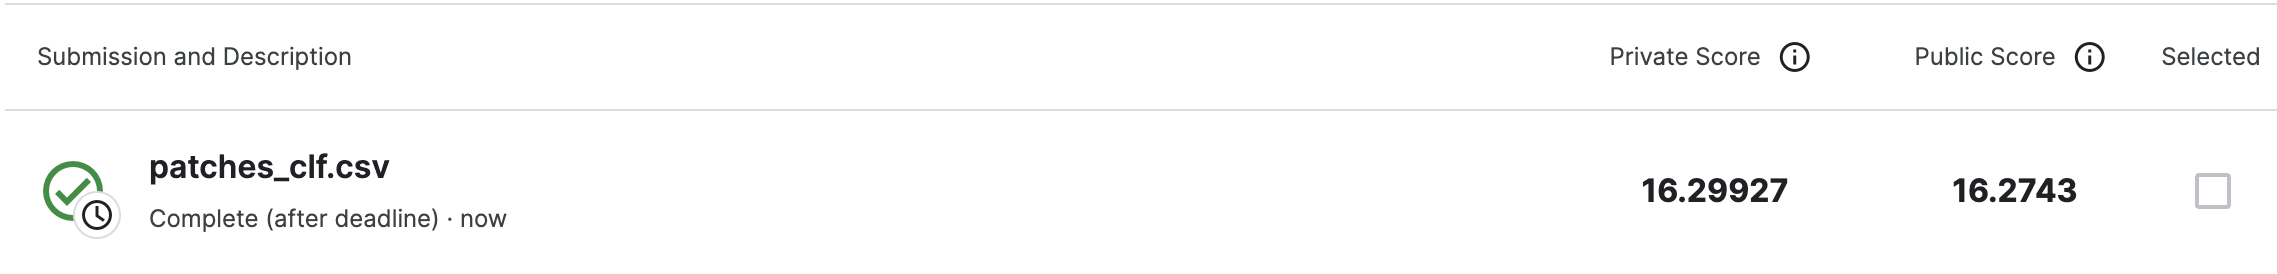

##### **Try New Thing**

In [ ]:
# Try bagging classifier with random parameters
try_bagging_clf = BaggingClassifier(clf, n_estimators=200, max_samples=0.5, max_features=1.0, 
                                    bootstrap=True, bootstrap_features=False)
try_bagging_clf.fit(train_features, train_labels)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                  max_samples=0.5, n_estimators=200)

In [ ]:
# Get predictions
try_predictions = try_bagging_clf.predict(test_features)

In [ ]:
# export csv file to upload to Kaggle
export_csv_from_prediction_array(try_predictions, "try_clf.csv")

The result from KAGGLE

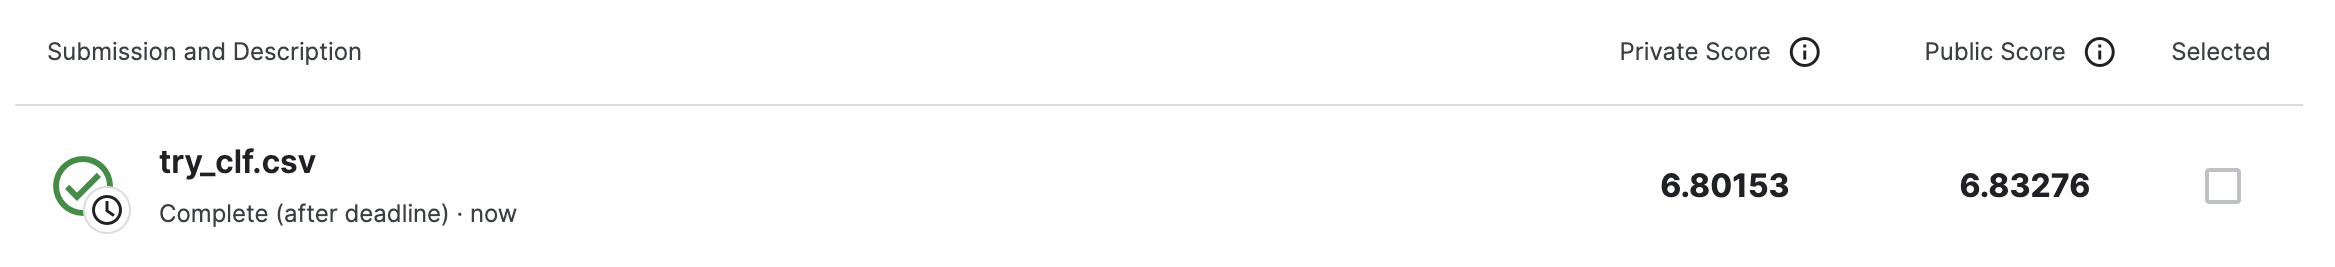

##### **Use GridSearchCV to find the best hyperparameters**

In [ ]:
# Set up param grid and fitting bagging classfier to the training set
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Set up params
param_grid_version = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Init Bagging Classifier with Decision Tree
bagging_clf_version = BaggingClassifier(estimator=DecisionTreeClassifier())

# Run random search
random_search_version = RandomizedSearchCV(estimator=bagging_clf_version, param_distributions=param_grid_version,
                                           n_iter=20, cv=5, random_state=42)

# Fitting model to the training set
random_search_version.fit(train_features, train_labels)

RandomizedSearchCV(cv=5,
                   estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
                   n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'bootstrap_features': [True, False],
                                        'max_features': [0.5, 0.8, 1.0],
                                        'max_samples': [0.5, 0.8, 1.0],
                                        'n_estimators': [10, 50, 100, 200,
                                                         500]},
                   random_state=42)

More than 2 hours executing...

In [ ]:
# Get the best param
random_search_version.best_params_

{'n_estimators': 200,
 'max_samples': 1.0,
 'max_features': 0.8,
 'bootstrap_features': True,
 'bootstrap': False}

In [ ]:
# Predict the test features
rsv_predictions = random_search_version.best_estimator_.predict(test_features)

In [ ]:
# export csv file to upload to Kaggle
export_csv_from_prediction_array(rsv_predictions, "rsv_clf.csv")

The result from KAGGLE

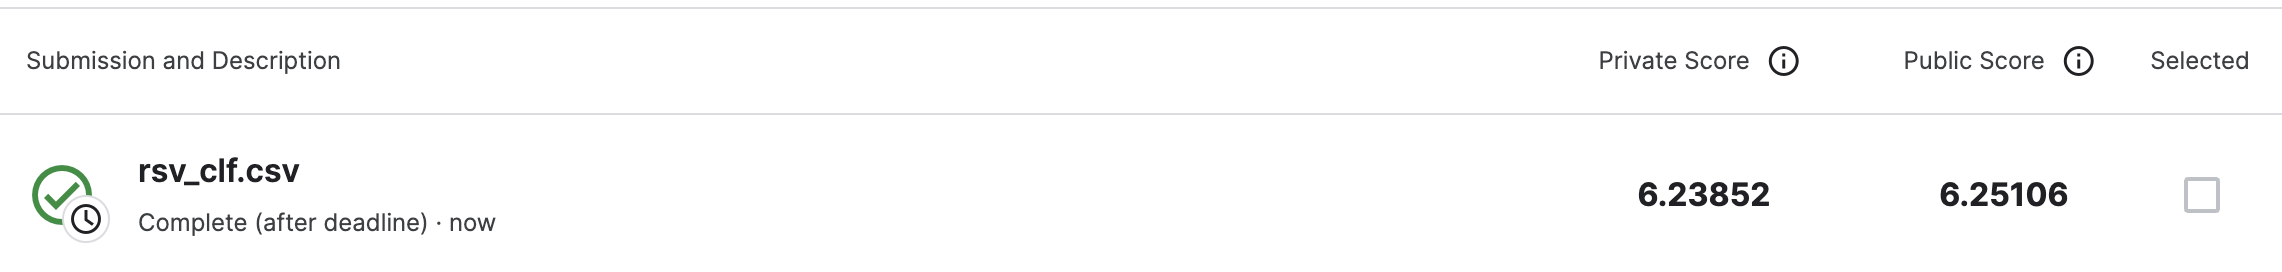

**This is my best score when Using BaggingClassifier**

##### **RandomForest**

I just found this classifier while doing this project on discussion of Kaggle, so I tried to use it to see how it was.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

random_forest_clf = RandomForestClassifier(n_estimators = 100)

In [ ]:
random_forest_clf.fit(train_features, train_labels)

RandomForestClassifier()

In [ ]:
# Predict the test features
random_forest_predictions = random_forest_clf.predict(test_features)

In [ ]:
# export csv file to upload to Kaggle
export_csv_from_prediction_array(random_forest_predictions, "random_forest_clf.csv")

This is the result from KAGGLE

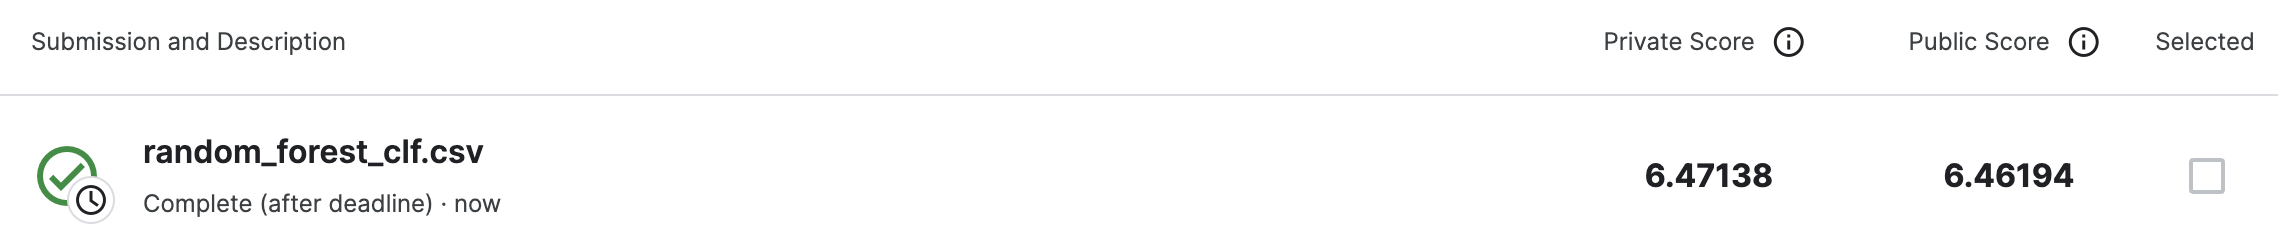

#### **9) Summary my work**

For this project, I mainly use 2 methods which are XGBOOST Classifier and various-form Bagging Classifier.

As following the instruction I have learned in previous lectures (XGBoost & Bagging Classifier), I successfully make my own hyper parameters for each classifier to find my best Score at KAGGLE.

My best score using XGBoost Classifier is 5.95.
My best score using Bagging Classifier is 6.24.

To finish this project, I also do some work to export csv file, analyze the dataset, but I still need more skill to modify dataset or hyperparameters to improve my score.

----------------------------------------------------------------

I just print the submission form to what it is and know how to modify for uploading to KAGGLE

In [ ]:
sampleSubmission = pd.read_csv('sampleSubmission.csv')
sampleSubmission

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
144364,1,0,0,0,0,0,0,0,0
144365,1,0,0,0,0,0,0,0,0
144366,1,0,0,0,0,0,0,0,0


In [ ]:
# Convert the one-hot encoded columns back into a single column
sampleSubmission['target'] = sampleSubmission.idxmax(axis=1)

# Drop the original one-hot encoded columns
otto_test_labels = sampleSubmission.drop(['Class_1', 'Class_2', 'Class_3', 
                            'Class_4', 'Class_5', 'Class_6',
                            'Class_7', 'Class_8', 'Class_9'], axis=1)

# Print the dataframe to confirm the conversion
print(otto_test_labels)

         target
id             
1       Class_1
2       Class_1
3       Class_1
4       Class_1
5       Class_1
...         ...
144364  Class_1
144365  Class_1
144366  Class_1
144367  Class_1
144368  Class_1

[144368 rows x 1 columns]


In [ ]:
otto_test_labels['target'].unique()

array(['Class_1'], dtype=object)